**Modelo de Clasificación Con Machine Learning para optimización de productividad en el CD Falabella Colombia**

# Tabla de Contenidos

- [Planteamiento Del Problema](#planteamiento-del-problema)
- [Objetivos](#objetivos)
- [Obtención del Set de datos](#obtencion-del-set-de-datos)
- [Exploracion de datos](#exploracion-de-datos)
- [Analisis de Datos (EDA)](#analisis-de-datos-eda)
- [Conclusiones del EDA](#conclusiones-del-eda)
- [Limpieza de Dataset](#limpieza-de-dataset)
- [Local 200](#local-200)
- [Observaciones](#observaciones)
- [Ajuste de Escalado](#ajuste-de-escalado)
- [Local 201](#local-201)
- [Local 202](#local-202)
- [Aplicación de Estandarización](#aplicacion-de-estandarizacion)
- [¿Qué es el StandardScaler?](#que-es-el-standardscaler)
- [Creación del modelo](#creacion-del-modelo)
- [Modelo Local 200](#modelo-local-200)
- [Modelo Local 201](#modelo-local-201)
- [Modelo Local 202](#modelo-local-202)
- [Evaluación Del Modelo](#evaluacion-del-modelo)


# **Planteamiento Del Problema**

**Optimización del Alistamiento de Pedidos en Falabella Retail Colombia**

Actualmente, en Falabella Retail Colombia, el centro de distribución ubicado en las afueras de Bogotá es el corazón de las operaciones logísticas, encargado de gestionar la distribución de productos tanto para las ventas físicas en los almacenes de todo el país como para los pedidos realizados a través del canal E-commerce. Sin embargo, el proceso de alistamiento de pedidos presenta desafíos significativos en términos de tiempo y eficiencia, lo que afecta directamente la productividad operativa y la capacidad de la empresa para cumplir con las promesas de entrega a los clientes. La creciente demanda de productos, especialmente en el comercio electrónico, exige una reducción en el tiempo de alistamiento con el fin de mejorar la competitividad, optimizar los recursos disponibles y garantizar una experiencia satisfactoria para los clientes.

El alistamiento de pedidos, que implica la preparación y el empaquetado de los productos solicitados por los clientes, involucra la coordinación de diversos factores logísticos, como la ubicación de los productos en el almacén, la disponibilidad de inventarios y la asignación de personal, así como de vehículos para la distribución. La variabilidad en estos factores, sumada a las fluctuaciones en la demanda y los tiempos de respuesta de los sistemas de gestión, puede generar cuellos de botella que afectan el rendimiento general de las operaciones.

El sistema actual contratado para la gestión de almacenamiento y despacho no cuenta con un proceso de optimización de los recorridos realizados por los operadores, tomando en cuenta la ubicación de los productos a despachar y su disponibilidad en el inventario. Esta falta de optimización se debe a las limitaciones de rendimiento del sistema y su diseño inicial. Como consecuencia, los operarios realizan recorridos innecesarios y, en algunos casos, excesivamente largos dentro del centro de distribución. Esto incrementa el tiempo de alistamiento, genera ineficiencias en el uso de los recursos y afecta la puntualidad de las entregas.

Para abordar este problema, se propone desarrollar e implementar un modelo de clasificación basado en redes neuronales, que optimice el proceso de alistamiento de pedidos, en comparación con un modelo de clustering basado en Machine Learning que sea capaz de encontrar, ordenar y agrupar las ordenes disponibles para picking de forma tal que se generen grupos de aquellas que se encuentran fisicamente mas cerca una de las otras, y asi poder generar una serie de olas de planificacion inteligentes que van a permitir:

* Realizar el recorrido por las ubicaciones una unica vez.
* Concentrar los recursos por secciones de modo tal que se minimice los recorridos necesarios
* Optimizar los tiempos reales del proceso de picking de un pedido.

# **Objetivos**

1. **Optimizar el tiempo de alistamiento de pedidos**: Reducir los tiempos de recorrido dentro del centro de distribución mediante la clasificación y reorganización de los productos, de manera que los operarios puedan acceder a ellos de forma más eficiente y rápida.

2. **Mejorar la productividad del personal operativo:** Minimizar el tiempo muerto durante los recorridos al reducir la distancia que el personal tiene que recorrer para alistar los productos, lo que aumentará la cantidad de pedidos procesados en el mismo periodo de tiempo.

3. **Reorganizar los pedidos mediante un modelo predictivo**: Utilizar un modelo de clasificación por red neuronal para reorganizar los pedidos generados por el sistema actual, con base en la proximidad de los productos y los recorridos dentro del almacén. Este modelo ayudará a clasificar los productos de tal forma que se minimicen los tiempos de desplazamiento y se maximicen los tiempos de productividad.

4. **Mejorar la promesa de entrega**: Al optimizar el proceso de alistamiento, la empresa podrá garantizar tiempos de entrega más rápidos y confiables a los clientes, lo que contribuirá a mejorar la experiencia del cliente y la competitividad de la marca.

5. **Desarrollar una solución escalable y sostenible**: Crear un sistema que pueda ser escalado a diferentes centros de distribución y adaptado a futuros aumentos en la demanda, mejorando continuamente la eficiencia de los procesos logísticos.

# **Obtención del Set de datos**

Para el proceso de obtención de la información, se acudió a la empresa Falabella, donde el estudiante realizó un desarrollo de software in-house que simula la "caída de pedidos". Este software aplica 8 reglas establecidas para definir la ubicación desde donde se tomará el producto del pedido por parte del cliente.

El sistema toma dos conjuntos de datos a partir de las bases de datos de la compañía: uno con el stock de Falabella y otro con los pedidos de la empresa hasta la fecha.

A partir de estos datos, se procedió a aplicar las 8 reglas de definición de ubicación, priorizándolas en función de:

1. Ubicaciones únicas en el centro de distribución (CD).
2. Ubicaciones con cantidades mayores.
3. Ubicaciones más cercanas por pasillo del CD.
4. Ubicaciones más cercanas en profundidad del pasillo.
5. Ubicaciones más cercanas al piso.
6. Ubicaciones con mayor tiempo almacenado.
7. Ubicaciones más cercanas a las zonas del CD.
8. Ubicaciones más cercanas en función de los huecos disponibles en la ubicación.

Este proceso da como resultado el set de datos cargado en el modelo, denominado "pedidos"

# **Exploracion de datos**

Se toma como base las transacciones generadas para un almacén durante un evento pico, con la información correspondiente sobre la ubicación donde debe realizarse el proceso de picking.

Para la generación del proceso, se cuenta con un conjunto de datos que contiene un total de 100.802 pedidos, cada uno de ellos con la ubicación física donde debe realizarse el picking. Este conjunto no presenta datos faltantes, y su estructura contiene las siguientes variables:


| **Variable**  | **Descripción**                                                                 |
|:--------------|:---------------------------------------------------------------------------------|
| **Cnpedido**  | Indica el número de pedido del cliente.                                           |
| **Czonalma**  | Zona dentro del CD representativa del lugar donde se encuentra el producto.      |
| **Cpasillo**  | Incluye el número del pasillo donde debe ubicarse el producto.                    |
| **Nnivelal**  | Altura interna del pasillo.                                                      |
| **Nposlarg**  | Profundidad del pasillo donde se encuentra el producto.                           |
| **Ubi**       | Representa el código de la ubicación para escaneo y localización del producto.   |
| **Linea**     | Dato de clasificación interna que representa a qué áreas pertenece el producto.  |
| **Sublinea**  | Subcategoría de línea.                                                           |
| **Clase**     | Subcategoría de sublínea.                                                        |
| **Subclase**  | Subcategoría de clase.                                                           |
| **Llave**     | Indicador representativo del producto.                                           |
| **CTIPTRAB**  | Representa el tipo de *picking* que se debe realizar, si es de piso o con maquinaria (Trilateral). |
| **Creferen**  | Código interno del producto en la empresa.                                        |
| **QUNIPEDI**  | Cantidad de producto solicitado por el cliente/tienda.                           |
| **CALMACEN**  | Código interno del local de origen del pedido.                                   |
| **TIPO**      | Indica el tipo de pedido.                                                        |





# Analisis de Datos (EDA)



In [ ]:
#Importamos la librerias necesarias para nuestro proceso
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re
import math as mt
import warnings
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min
warnings.filterwarnings('ignore')

Para evitar que el servicio de lectura en el entorno se vea afectado, configuramos el entorno de manera que nos permita visualizar las columnas que componen nuestro conjunto de datos.

In [ ]:
pd.set_option('display.max_columns', None)

In [ ]:
#Iniciamos Importando los datos dentro de nuestro entorno
df = pd.read_csv('/content/Pedidos.csv', on_bad_lines='skip', delimiter=';')
df.head()

,czonalma,cpasillo,nposlarg,nnivelal,ubi,linea,sublinea,clase,subclase,llave,CTIPTRAB,CNPEDIDO,CREFEREN,QUNIPEDI,CALMACEN,TIPO
0,CZ1,02I,75,2,CZ1-02I-232,J10,J1003,J100304,J10030401,20072780962,FG,12735430540,72780962,1,200,SINGLE
1,CZ1,02D,76,1,CZ1-02D-241,J10,J1004,J100402,J10040201,20072780988,FP,12734634598,72780988,1,200,SINGLE
2,CZ1,02D,76,1,CZ1-02D-241,J10,J1004,J100402,J10040201,20072780988,FP,12734450198,72780988,1,200,SINGLE
3,CZ1,02D,76,1,CZ1-02D-241,J10,J1004,J100402,J10040201,20072780988,F2,12736007925,72780988,1,200,MULTI
4,CZ1,08D,25,3,CZ1-08D-0P3,J10,J1001,J100107,J10010701,20072738125,G2,12736299535,72738125,1,200,MULTI


Una vez que hemos importado nuestros datos al entorno, procedemos a comprender su estructura. Esto incluye aspectos como la cantidad de columnas presentes, la cantidad de datos únicos, entre otros. Para ello, utilizamos el siguiente código:

In [ ]:
#Cantidad de Registros y columnas
print(df.shape)

(100801, 16)


In [ ]:
#Analizamos los tipos de datos que tenemos en nuestros datos
print(df.dtypes)

czonalma    object
cpasillo    object
nposlarg     int64
nnivelal     int64
ubi         object
linea       object
sublinea    object
clase       object
subclase    object
llave       object
CTIPTRAB    object
CNPEDIDO     int64
CREFEREN     int64
QUNIPEDI     int64
CALMACEN     int64
TIPO        object
dtype: object


In [ ]:
# Validamos que en el set no tengamos datos nulls para asi poder validar si se requiere limpieza

null_data = pd.DataFrame({
    'Column': df.columns,
    'Null Count': df.isnull().sum(),
    'Null Percentage': df.isnull().mean() * 100
})

# Establecer el índice del DataFrame para que sea el nombre de las columnas
null_data.set_index('Column', inplace=True)

# Mostrar el DataFrame con los valores nulos y sus porcentajes
print("Valores nulos en cada columna:")
null_data

Valores nulos en cada columna:


,Null Count,Null Percentage
Column,,
czonalma,0,0.0
cpasillo,0,0.0
nposlarg,0,0.0
nnivelal,0,0.0
ubi,0,0.0
linea,0,0.0
sublinea,0,0.0
clase,0,0.0
subclase,0,0.0


De acuerdo con los análisis realizados hasta el momento, hemos comprobado que contamos con varias variables/columnas cuyos tipos de datos son compuestos, según lo dispuesto por la compañía.

Esto indica que es necesario realizar una conversión de la información entregada para permitir su correcta manipulación dentro del proceso de modelado.

Además, se puede evidenciar que los datos proporcionados han sido debidamente depurados, evitando la entrega de información innecesaria o que no aporta valor al modelo.

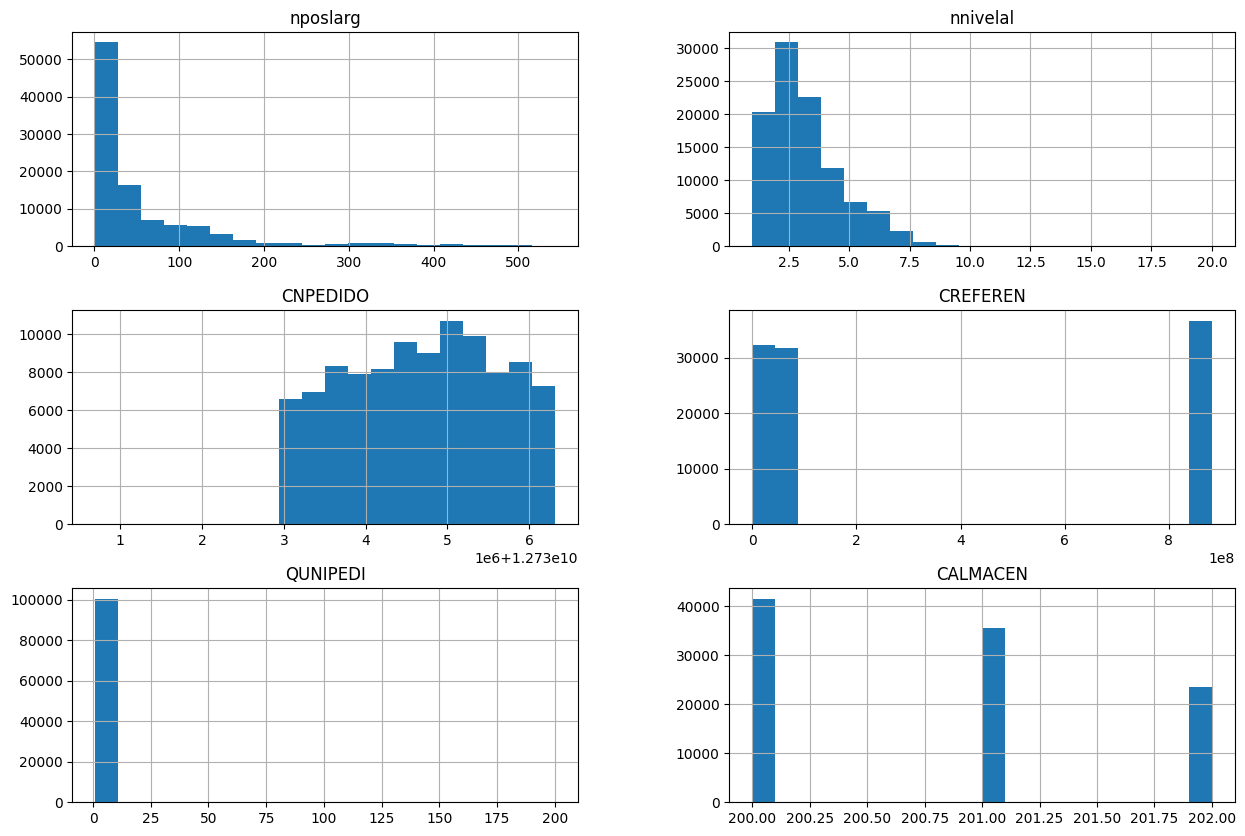

In [ ]:
#distribucion de valores
df.hist(bins=20, figsize=(15,10))
plt.show()

In [ ]:
#Validacion de valores unicos
print("Valores tipo Trabajo: ", len(df['CTIPTRAB'].unique()))
print("Valores Zonas: ", len(df['czonalma'].unique()))
print("Valores pasillos: ", len(df['cpasillo'].unique()))
print("Valores Largueros: ", len(df['nposlarg'].unique()))
print("Valores Niveles: ", len(df['nnivelal'].unique()))
print("Valores ubicaciones: ", len(df['ubi'].unique()))
print("Valores lineas: ", len(df['linea'].unique()))
print("Valores clases: ", len(df['clase'].unique()))
print("Valores sublineas: ", len(df['sublinea'].unique()))
print("Valores subclases: ", len(df['subclase'].unique()))
print("Valores llave: ", len(df['llave'].unique()))
print("Valores Productos: ", len(df['CREFEREN'].unique()))
print("Valores cantidad pedida: ", len(df['QUNIPEDI'].unique()))
print("Valores almacen: ", len(df['CALMACEN'].unique()))
print("Valores tipo pedido: ", len(df['TIPO'].unique()))

Valores tipo Trabajo:  10
Valores Zonas:  18
Valores pasillos:  39
Valores Largueros:  345
Valores Niveles:  19
Valores ubicaciones:  9917
Valores lineas:  17
Valores clases:  394
Valores sublineas:  96
Valores subclases:  841
Valores llave:  6198
Valores Productos:  14684
Valores cantidad pedida:  50
Valores almacen:  3
Valores tipo pedido:  2


In [ ]:
#Informacion estadistica del set
df.describe(include='all')

,czonalma,cpasillo,nposlarg,nnivelal,ubi,linea,sublinea,clase,subclase,llave,CTIPTRAB,CNPEDIDO,CREFEREN,QUNIPEDI,CALMACEN,TIPO
count,100801,100801,100801.000000,100801.000000,100801,100801,100801,100801,100801,100801,100801,1.008010e+05,1.008010e+05,100801.000000,100801.000000,100801
unique,18,39,NaN,NaN,9917,17,96,394,841,6198,10,NaN,NaN,NaN,NaN,2
top,CZ1,1,NaN,NaN,JOR-002-130,J11,J0802,J080201,J11050203,"2,00883E+11",G5,NaN,NaN,NaN,NaN,SINGLE
freq,16683,7872,NaN,NaN,1110,25489,12282,8481,6543,19360,20562,NaN,NaN,NaN,NaN,58713
mean,NaN,NaN,60.626908,2.855805,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.273468e+10,3.476791e+08,1.160723,200.821549,NaN
std,NaN,NaN,88.872509,1.675143,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.216098e+05,4.050271e+08,1.791783,0.784080,NaN
min,NaN,NaN,1.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.273069e+10,4.478800e+04,1.000000,200.000000,NaN
25%,NaN,NaN,10.000000,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.273391e+10,2.889635e+07,1.000000,200.000000,NaN
50%,NaN,NaN,25.000000,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.273472e+10,7.271261e+07,1.000000,201.000000,NaN
75%,NaN,NaN,75.000000,4.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.273543e+10,8.825220e+08,1.000000,201.000000,NaN


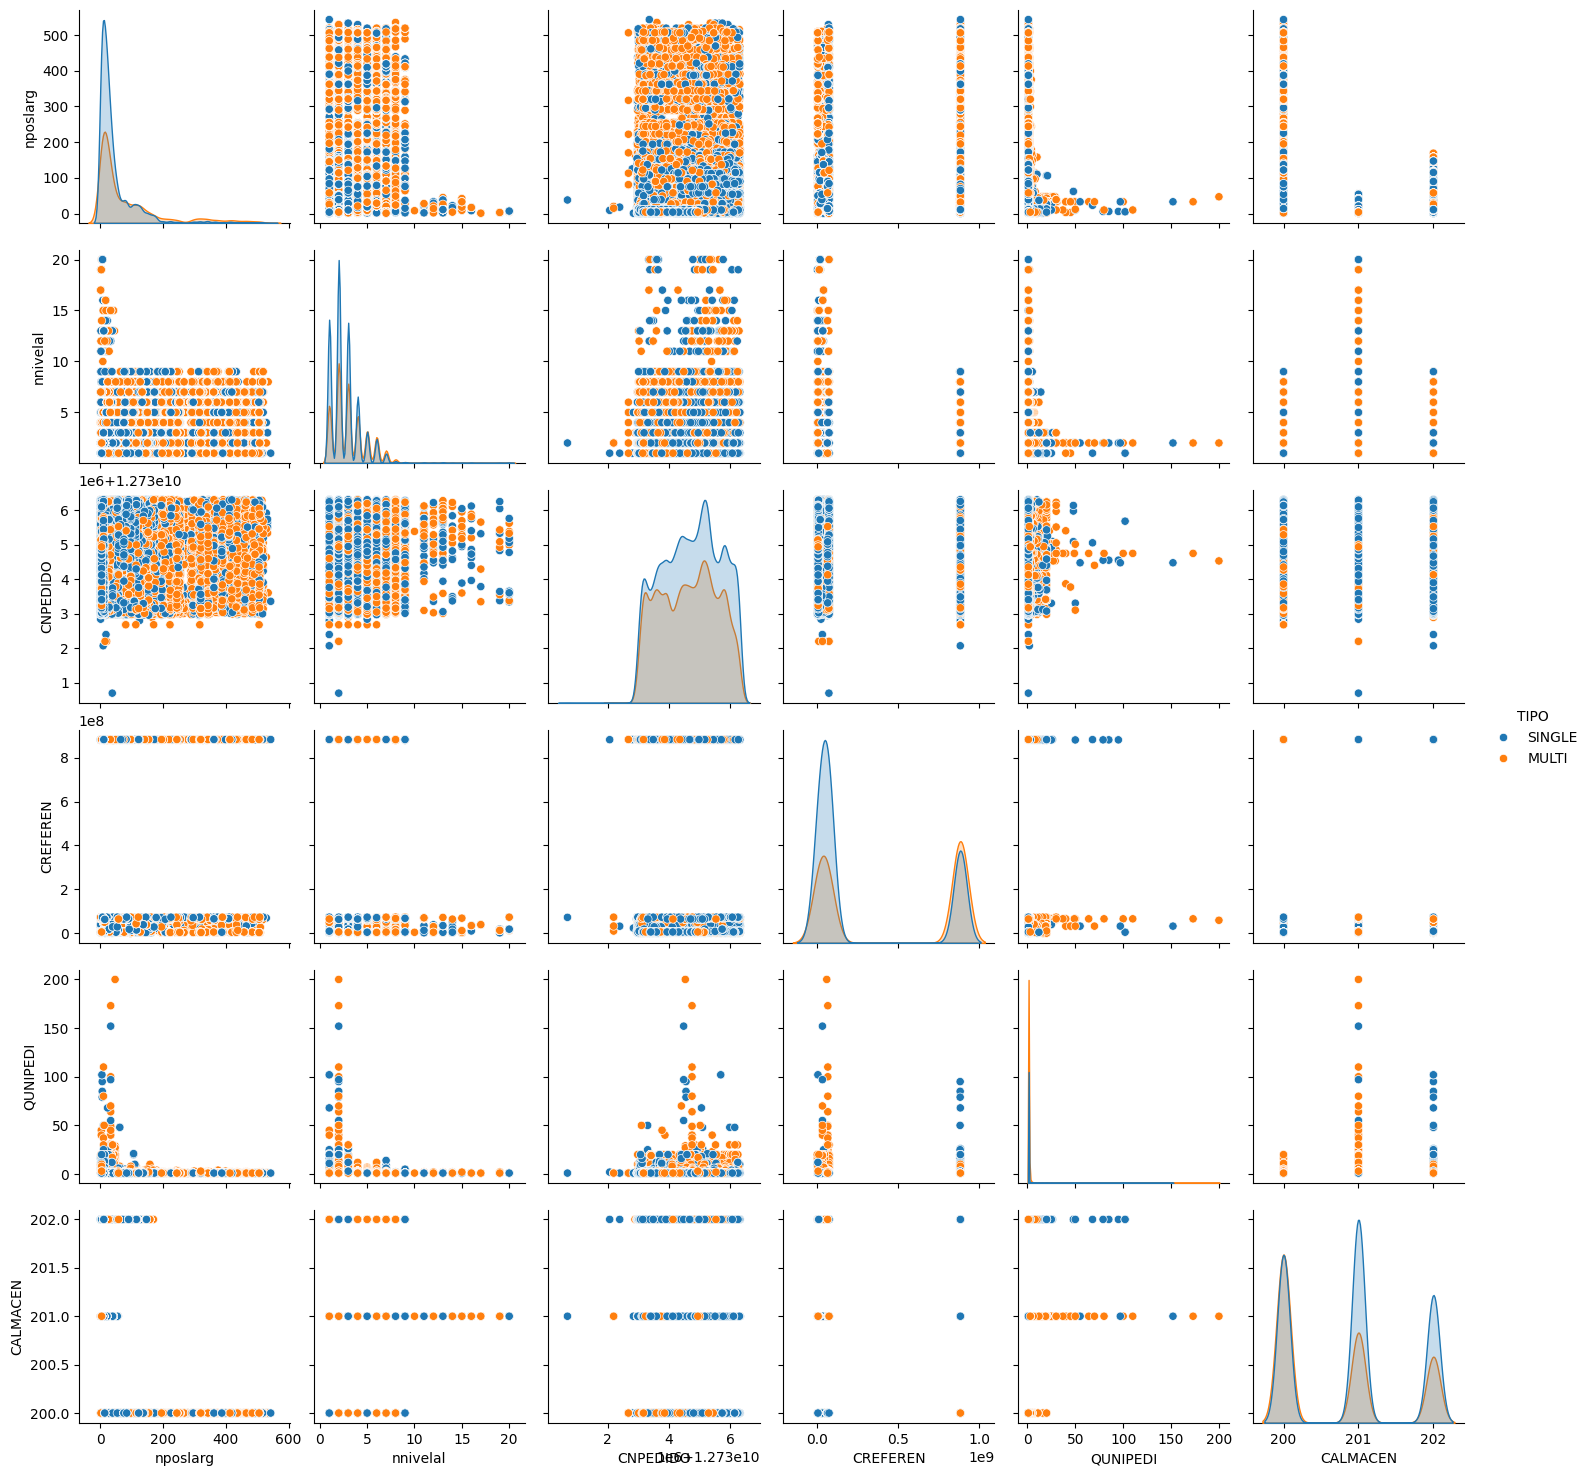

In [ ]:
#Diagramas de dispersión:
sns.pairplot(df, hue="TIPO")
plt.show()

# **Conclusiones del EDA**

Tras realizar el Análisis Exploratorio de Datos (EDA), hemos llegado a diversas conclusiones que son clave para la correcta ejecución del modelo que se diseñará:

* Se dispone de un total de **100,801 registros/pedidos**, con **16 columnas** de identificación para cada uno.
* El **dataset** no contiene datos nulos, lo que significa que contamos con la información más limpia y precisa posible.
* Existen columnas descriptivas que no aportan valor al modelo, tales como **'llave', 'linea', 'sublinea', 'clase', 'subclase' y 'CTIPTRAB'**. Estas son variables categóricas identificadoras del pedido; sin embargo, dado que el objetivo del modelo es validar distancias para la clasificación, estas columnas no son relevantes en el conjunto de datos.
* El conjunto de datos incluye un total de **9,900 productos distintos** vendidos o distribuidos por parte del **CD** (Centro de Distribución).



# Limpieza de Dataset


In [ ]:
#Eliminamos de nuestro set los campos descriptivos no requeridos
df_limpio = df.copy()

df_limpio.drop(['llave', 'linea', 'sublinea', 'clase', 'subclase', 'CTIPTRAB'], axis=1, inplace=True)

df_limpio.head()

,czonalma,cpasillo,nposlarg,nnivelal,ubi,CNPEDIDO,CREFEREN,QUNIPEDI,CALMACEN,TIPO
0,CZ1,02I,75,2,CZ1-02I-232,12735430540,72780962,1,200,SINGLE
1,CZ1,02D,76,1,CZ1-02D-241,12734634598,72780988,1,200,SINGLE
2,CZ1,02D,76,1,CZ1-02D-241,12734450198,72780988,1,200,SINGLE
3,CZ1,02D,76,1,CZ1-02D-241,12736007925,72780988,1,200,MULTI
4,CZ1,08D,25,3,CZ1-08D-0P3,12736299535,72738125,1,200,MULTI


Una vez eliminados los datos que no aportan, procedemos, con el apoyo de los profesionales de la compañía, a entender la información.

De acuerdo a esto, se resalta que es importante **redistribuir los datos** en función de los locales (columna **CALMACEN** del conjunto de datos), ya que la distribución y construcción física de estos afectan cómo se encuentran diseñados los espacios de almacenamiento. Por lo tanto, el conjunto de información debe estar segmentado por cada local.

Esto se puede evidenciar al graficar nuestra distribución de datos, como se muestra a continuación:


## Local 200

In [ ]:
#Generamos los datos por local y validamos con el dato de unique values
df_local200 = df_limpio[df_limpio['CALMACEN'] == 200]
print("locales en el set:", df_local200['CALMACEN'].unique())
print("Pedidos:", len(df_local200))

print()
df_local200.head()

locales en el set: [200]
Pedidos: 41584



,czonalma,cpasillo,nposlarg,nnivelal,ubi,CNPEDIDO,CREFEREN,QUNIPEDI,CALMACEN,TIPO
0,CZ1,02I,75,2,CZ1-02I-232,12735430540,72780962,1,200,SINGLE
1,CZ1,02D,76,1,CZ1-02D-241,12734634598,72780988,1,200,SINGLE
2,CZ1,02D,76,1,CZ1-02D-241,12734450198,72780988,1,200,SINGLE
3,CZ1,02D,76,1,CZ1-02D-241,12736007925,72780988,1,200,MULTI
4,CZ1,08D,25,3,CZ1-08D-0P3,12736299535,72738125,1,200,MULTI


In [ ]:
#Realizamos un MAPEO DE DATOS en función del siguiente diccionario
dicc_pisos = {
    "CZ1": 1.2,
    "CZ2": 2.4,
    "MZ3": 3.6,
    "MZ4": 4.8,
    "MZ5": 6,
    "MZ2": 2.4,
    "CI3": 3.6,
    "DM2": 2.4
}

#Creamos el nuevo campo llamado piso, que corresponde al equivalente del alto (y)
df_local200['piso'] = df_local200['czonalma'].apply(lambda x: dicc_pisos[x])

# Se crea y aplica funcion para extraer el numero del pasillo del almacen, correspondiente al profundidad (z)
def extract_pasillo(cpasillo):
    regex= re.compile('1[0-9]|[1-9]')
    match= regex.findall(cpasillo)
    match= match[0]
    return match

df_local200['pasillo'] = df_local200['cpasillo'].apply(extract_pasillo)
df_local200['pasillo'] = df_local200['pasillo'].astype('int64')

df_local200

,czonalma,cpasillo,nposlarg,nnivelal,ubi,CNPEDIDO,CREFEREN,QUNIPEDI,CALMACEN,TIPO,piso,pasillo
0,CZ1,02I,75,2,CZ1-02I-232,12735430540,72780962,1,200,SINGLE,1.2,2
1,CZ1,02D,76,1,CZ1-02D-241,12734634598,72780988,1,200,SINGLE,1.2,2
2,CZ1,02D,76,1,CZ1-02D-241,12734450198,72780988,1,200,SINGLE,1.2,2
3,CZ1,02D,76,1,CZ1-02D-241,12736007925,72780988,1,200,MULTI,1.2,2
4,CZ1,08D,25,3,CZ1-08D-0P3,12736299535,72738125,1,200,MULTI,1.2,8
...,...,...,...,...,...,...,...,...,...,...,...,...
100794,MZ4,01D,508,2,MZ4-01D-E42,12733169954,882704902,1,200,MULTI,4.8,1
100795,MZ5,03I,506,4,MZ5-03I-E24,12734356933,882763054,1,200,SINGLE,6.0,3
100796,MZ5,03I,506,4,MZ5-03I-E24,12734266942,882763054,1,200,MULTI,6.0,3
100797,MZ5,03I,506,4,MZ5-03I-E24,12734415739,882763054,1,200,SINGLE,6.0,3


In [ ]:
#Graficas de cruce de pasillos para validar expresion regular
pd.crosstab(df_local200['cpasillo'], df_local200['pasillo'])

pasillo,1,2,3,4,5,6,7,8,9,10,11,12,13
cpasillo,,,,,,,,,,,,,
01D,2251,0,0,0,0,0,0,0,0,0,0,0,0
01I,1482,0,0,0,0,0,0,0,0,0,0,0,0
02D,0,1775,0,0,0,0,0,0,0,0,0,0,0
02I,0,1815,0,0,0,0,0,0,0,0,0,0,0
03D,0,0,2508,0,0,0,0,0,0,0,0,0,0
03I,0,0,2307,0,0,0,0,0,0,0,0,0,0
04D,0,0,0,2078,0,0,0,0,0,0,0,0,0
04I,0,0,0,878,0,0,0,0,0,0,0,0,0
05D,0,0,0,0,2556,0,0,0,0,0,0,0,0


Como se observó en el procedimiento anterior, hemos creado un diccionario que estandariza los datos, con el objetivo de poder generar nuestros gráficos y cálculos en función de las distancias euclidianas para el modelado. Es importante aclarar que se aplica una distancia uniforme en el diccionario entre los pisos, a fin de mantener las distancias físicas del espacio de almacenamiento.

Además, se aplican diversos diccionarios para que cada almacén tenga su propia nomenclatura. Con los datos ya estandarizados, podemos proceder a graficar la información de la siguiente manera:


In [ ]:
#Extraemos datos para graficar
df_graf_20 = df_local200[['piso', 'pasillo', 'nposlarg']]
df_graf_20

,piso,pasillo,nposlarg
0,1.2,2,75
1,1.2,2,76
2,1.2,2,76
3,1.2,2,76
4,1.2,8,25
...,...,...,...
100794,4.8,1,508
100795,6.0,3,506
100796,6.0,3,506
100797,6.0,3,506


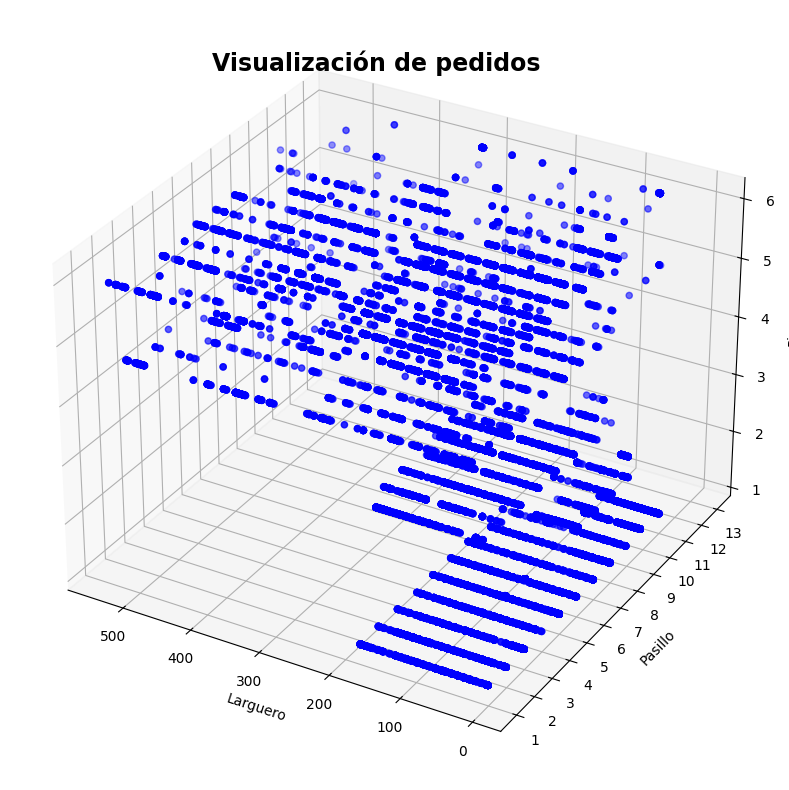

In [ ]:
# Generamos el gráfico
fig = plt.figure(figsize=(15, 10))  # Ajustamos el tamaño de la figura
fig.suptitle('Visualización de pedidos', y=0.84, fontweight="black", fontsize=17)

# Crear el gráfico 3D
ax1 = fig.add_subplot(111, projection='3d')

# Graficar los datos
ax1.scatter(df_graf_20['nposlarg'], df_graf_20['pasillo'], df_graf_20['piso'], c='b', marker='o')

# Invertir el eje X
ax1.invert_xaxis()

# Establecer los ticks para el eje Y
plt.yticks(range(1, mt.ceil(max(df_graf_20['pasillo'])) + 1, 1))

# Establecer los ticks para el eje Z (Piso)
ax1.set_zticks(range(1, int(max(df_graf_20['piso'])) + 1, 1))


# Etiquetas de los ejes
plt.xlabel('Larguero')
plt.ylabel('Pasillo')
ax1.set_zlabel('Piso', rotation=90)

# Mostrar el gráfico
plt.show()


Una vez ajustados los datos, generamos su visualización en un plano tridimensional, con el siguiente comportamiento en los ejes:

- **Eje X**: Representa el **Pasillo**, simulando el ancho de la zona.
- **Eje Y**: Representa los **Largueros**, simulando la profundidad de cada pasillo.
- **Eje Z**: Representa el **Piso**, simulando cada nivel de altura en el almacén.

### Observaciones

En esta visualización tridimensional, fue posible notar un desfase en la distribución física de los datos. Esto se debe a que en los pisos superiores se observa una mayor profundidad, dado que en estos niveles existen más ubicaciones. Este patrón afectaría el procesamiento de los datos en el modelo, ya que asignaría una mayor ponderación a las distancias más lejanas. Sin embargo, en la realidad física, estas ubicaciones están en el mismo punto o a una distancia de pocos centímetros.


### Ajuste de Escalado

Para mejorar la precisión del modelo, es necesario aplicar un escalado de los datos. Esto permitirá al modelo procesar la información de manera más precisa, reflejando mejor las distancias reales en el almacén. Aplicamos un escalador de tal forma que:


In [ ]:
#Generacion de estandarizacion

#sacamos los pisos del modelo
l_pisos = list(df_graf_20['piso'].unique())
df_standard = np.empty((0, 3))

#Aplicamos un scaler de entre 0 y 100 para la profundidad (nposlarg)
scaler = MinMaxScaler(feature_range=(1, 100))
for i in l_pisos:
    df_temp = df_graf_20[df_graf_20['piso']== i]
    scaler.fit(df_temp[['nposlarg']])
    df_temp.loc[:,'nposlarg'] = scaler.transform(df_temp[['nposlarg']])
    df_standard = np.concatenate((df_standard, df_temp))

df_standard_20= pd.DataFrame(data = df_standard, columns= ['piso', 'pasillo', 'nposlarg'])


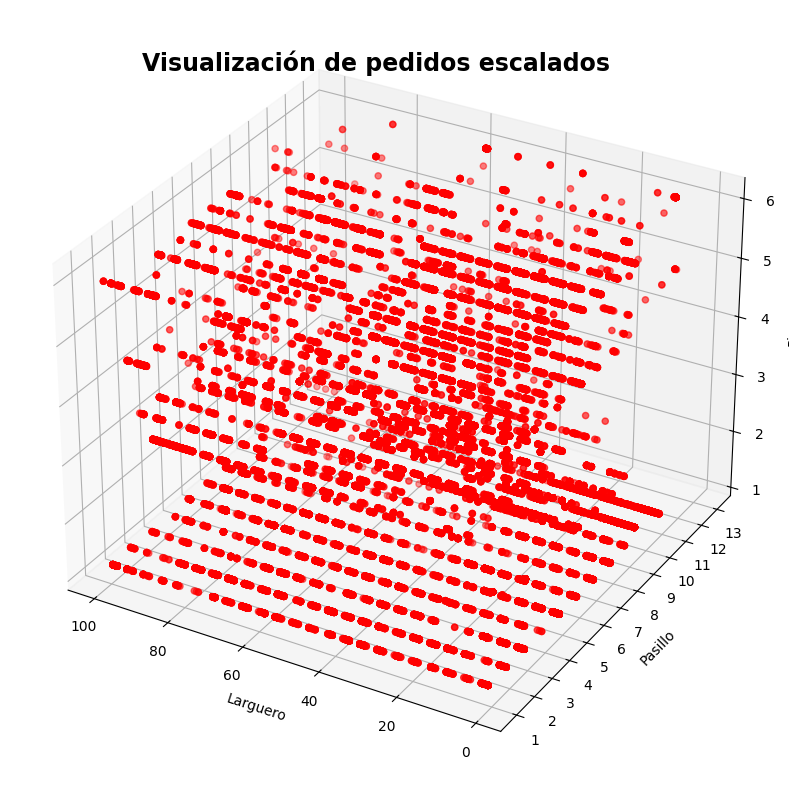

In [ ]:
#Nuevamente graficamos

# Generamos el gráfico
fig = plt.figure(figsize=(15, 10))  # Ajustamos el tamaño de la figura
fig.suptitle('Visualización de pedidos escalados', y=0.84, fontweight="black", fontsize=17)

# Crear el gráfico 3D
ax1 = fig.add_subplot(111, projection='3d')

# Graficar los datos
ax1.scatter(df_standard_20['nposlarg'], df_standard_20['pasillo'], df_standard_20['piso'], c='r', marker='o')

# Invertir el eje X
ax1.invert_xaxis()

# Establecer los ticks para el eje Y
plt.yticks(range(1, mt.ceil(max(df_standard_20['pasillo'])) + 1, 1))

# Establecer los ticks para el eje Z (Piso)
ax1.set_zticks(range(1, int(max(df_standard_20['piso'])) + 1, 1))


# Etiquetas de los ejes
plt.xlabel('Larguero')
plt.ylabel('Pasillo')
ax1.set_zlabel('Piso', rotation=90)

# Mostrar el gráfico
plt.show()

Como observamos, una vez escalados los datos, el gráfico logra distribuir los puntos en el plano de tal forma que se mantiene la distancia entre ellos sin dar una mayor ponderación a las distancias que sobresalen en las zonas más altas del local. Con esto, ya podemos generar nuestro modelo de datos y aplicar el mismo procedimiento a cada uno de los conjuntos de datos de los locales, de acuerdo con sus pisos.



---



## Local 201

En este local ocurre un caso especial, ya que los valores de las zonas 'JOC', 'JOM', 'JOP' y 'JOR' corresponden únicamente a maquinaria pesada. Por esta razón, el método de planeación de pedidos no es aplicable a este modelo, lo cual limita nuestro margen de trabajo.

Con esto en mente, procedemos a limpiar los datos de la siguiente manera:

In [ ]:
#local 201
#Generamos los datos por local y validamos con el dato de unique values
df_local201 = df_limpio[(df_limpio['CALMACEN'] == 201) & (~df_limpio['czonalma'].isin(['JOC', 'JOM', 'JOP', 'JOR']))]
print("locales en el set:", df_local201['CALMACEN'].unique())
print("Pedidos:", len(df_local201))

print()
df_local201.head()

locales en el set: [201]
Pedidos: 5512



,czonalma,cpasillo,nposlarg,nnivelal,ubi,CNPEDIDO,CREFEREN,QUNIPEDI,CALMACEN,TIPO
30,A04,02I,21,2,A04-02I-082,12736274259,72781989,1,201,SINGLE
31,A04,02I,21,2,A04-02I-082,12735009524,72781989,1,201,SINGLE
55,A04,02I,21,2,A04-02I-082,12734599132,55705662,1,201,SINGLE
56,A04,02I,21,2,A04-02I-082,12735203519,55705662,1,201,SINGLE
114,A04,02I,17,3,A04-02I-067,12735030771,19536821,1,201,SINGLE


In [ ]:
#Realizamos un MAPEO DE DATOS en función del siguiente diccionario
dicc_pisos = {
    "A04" : 4.8,
    "A02": 1.2
}

#Creamos el nuevo campo llamado piso, que corresponde al equivalente del alto (y)
df_local201['piso'] = df_local201['czonalma'].apply(lambda x: dicc_pisos[x])

df_local201['pasillo'] = df_local201['cpasillo'].apply(extract_pasillo)
df_local201['pasillo'] = df_local201['pasillo'].astype('int64')

df_local201

,czonalma,cpasillo,nposlarg,nnivelal,ubi,CNPEDIDO,CREFEREN,QUNIPEDI,CALMACEN,TIPO,piso,pasillo
30,A04,02I,21,2,A04-02I-082,12736274259,72781989,1,201,SINGLE,4.8,2
31,A04,02I,21,2,A04-02I-082,12735009524,72781989,1,201,SINGLE,4.8,2
55,A04,02I,21,2,A04-02I-082,12734599132,55705662,1,201,SINGLE,4.8,2
56,A04,02I,21,2,A04-02I-082,12735203519,55705662,1,201,SINGLE,4.8,2
114,A04,02I,17,3,A04-02I-067,12735030771,19536821,1,201,SINGLE,4.8,2
...,...,...,...,...,...,...,...,...,...,...,...,...
99768,A04,05I,11,3,A04-05I-043,12735501912,8086934,1,201,SINGLE,4.8,5
99769,A04,05I,11,3,A04-05I-043,12736274228,8086934,1,201,SINGLE,4.8,5
99770,A04,05I,11,3,A04-05I-043,12735821577,8086934,1,201,SINGLE,4.8,5
99771,A04,05I,11,3,A04-05I-043,12735766342,8086934,1,201,SINGLE,4.8,5


In [ ]:
#Graficas de cruce de pasillos para validar expresion regular
pd.crosstab(df_local201['cpasillo'], df_local201['pasillo'])

pasillo,1,2,3,4,5,12
cpasillo,,,,,,
01D,358,0,0,0,0,0
01I,268,0,0,0,0,0
02D,0,701,0,0,0,0
02I,0,438,0,0,0,0
03D,0,0,8,0,0,0
03I,0,0,29,0,0,0
04D,0,0,0,66,0,0
04I,0,0,0,99,0,0
05D,0,0,0,0,295,0


In [ ]:
#Extraemos datos para graficar
df_graf_21 = df_local201[['piso', 'pasillo', 'nposlarg']]
df_graf_21

,piso,pasillo,nposlarg
30,4.8,2,21
31,4.8,2,21
55,4.8,2,21
56,4.8,2,21
114,4.8,2,17
...,...,...,...
99768,4.8,5,11
99769,4.8,5,11
99770,4.8,5,11
99771,4.8,5,11


In [ ]:
#Generacion de estandarizacion

#sacamos los pisos del modelo
l_pisos = list(df_graf_21['piso'].unique())
df_standard = np.empty((0, 3))

#Aplicamos un scaler de entre 0 y 100 para la profundidad (nposlarg)
scaler = MinMaxScaler(feature_range=(1, 100))
for i in l_pisos:
    df_temp = df_graf_21[df_graf_21['piso']== i]
    scaler.fit(df_temp[['nposlarg']])
    df_temp.loc[:,'nposlarg'] = scaler.transform(df_temp[['nposlarg']])
    df_standard = np.concatenate((df_standard, df_temp))

df_standard_21= pd.DataFrame(data = df_standard, columns= ['piso', 'pasillo', 'nposlarg'])

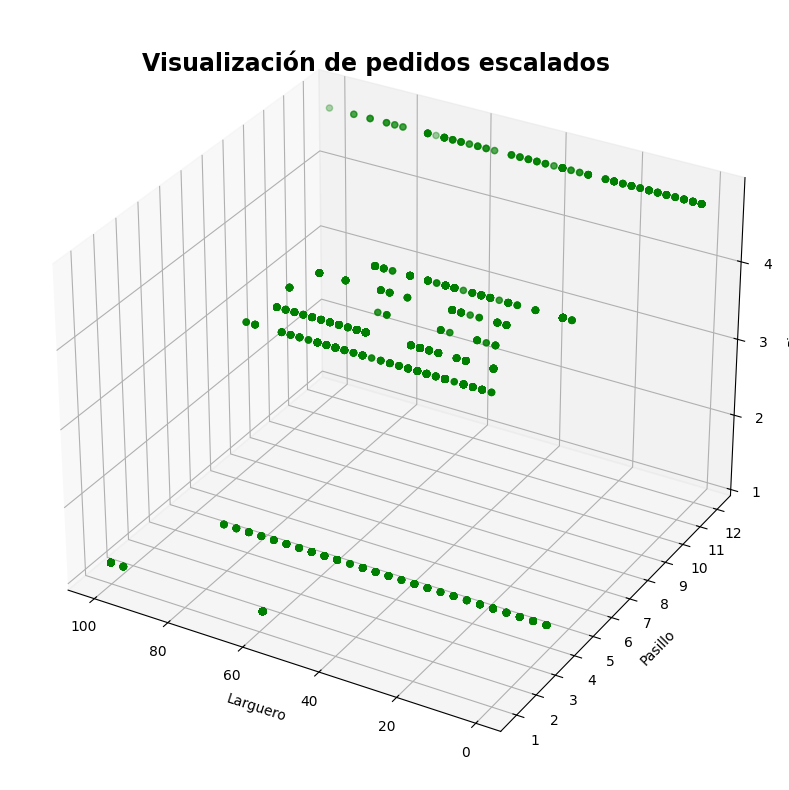

In [ ]:
#Nuevamente graficamos

# Generamos el gráfico
fig = plt.figure(figsize=(15, 10))  # Ajustamos el tamaño de la figura
fig.suptitle('Visualización de pedidos escalados', y=0.84, fontweight="black", fontsize=17)

# Crear el gráfico 3D
ax1 = fig.add_subplot(111, projection='3d')

# Graficar los datos
ax1.scatter(df_standard_21['nposlarg'], df_standard_21['pasillo'], df_standard_21['piso'], c='g', marker='o')

# Invertir el eje X
ax1.invert_xaxis()

# Establecer los ticks para el eje Y
plt.yticks(range(1, mt.ceil(max(df_standard_21['pasillo'])) + 1, 1))

# Establecer los ticks para el eje Z (Piso)
ax1.set_zticks(range(1, int(max(df_standard_21['piso'])) + 1, 1))


# Etiquetas de los ejes
plt.xlabel('Larguero')
plt.ylabel('Pasillo')
ax1.set_zlabel('Piso', rotation=90)

# Mostrar el gráfico
plt.show()



---



## Local 202

Al igual que en el caso anterior, es necesario realizar el proceso de limpieza para los registros de las zonas 'MRF' y 'MRJ', ya que corresponden también a maquinaria pesada. Esto implica que el método de planeación de pedidos no es aplicable en estos casos.

Procedemos a limpiar los datos de manera similar:

In [ ]:
#local 202
#Generamos los datos por local y validamos con el dato de unique values
df_local202 = df_limpio[(df_limpio['CALMACEN'] == 202) & (~df_limpio['czonalma'].isin(['MRJ', 'MRF']))]
print("locales en el set:", df_local202['CALMACEN'].unique())
print("Pedidos:", len(df_local202))

print()
df_local202.head()

locales en el set: [202]
Pedidos: 5660



,czonalma,cpasillo,nposlarg,nnivelal,ubi,CNPEDIDO,CREFEREN,QUNIPEDI,CALMACEN,TIPO
618,MB1,12,5,3,MB1-012-019,12733183998,882729948,1,202,SINGLE
619,MB1,12,5,3,MB1-012-019,12736270596,882729948,1,202,MULTI
620,MB1,12,5,3,MB1-012-019,12734046445,882729948,1,202,SINGLE
621,MB1,12,5,3,MB1-012-019,12735753267,882729948,1,202,SINGLE
622,MB1,12,5,3,MB1-012-019,12736124578,882729948,1,202,MULTI


In [ ]:
#Realizamos un MAPEO DE DATOS en función del siguiente diccionario
dicc_pisos = {
    "MB1": 1,
    "MZ2": 2,
    "MB2": 2,
    "MZ4": 4,
    "MZ5": 5,
    "MB3": 3
}

#Creamos el nuevo campo llamado piso, que corresponde al equivalente del alto (y)
df_local202['piso'] = df_local202['czonalma'].apply(lambda x: dicc_pisos[x])

df_local202['pasillo'] = df_local202['cpasillo'].apply(extract_pasillo)
df_local202['pasillo'] = df_local202['pasillo'].astype('int64')

df_local202

,czonalma,cpasillo,nposlarg,nnivelal,ubi,CNPEDIDO,CREFEREN,QUNIPEDI,CALMACEN,TIPO,piso,pasillo
618,MB1,12,5,3,MB1-012-019,12733183998,882729948,1,202,SINGLE,1,12
619,MB1,12,5,3,MB1-012-019,12736270596,882729948,1,202,MULTI,1,12
620,MB1,12,5,3,MB1-012-019,12734046445,882729948,1,202,SINGLE,1,12
621,MB1,12,5,3,MB1-012-019,12735753267,882729948,1,202,SINGLE,1,12
622,MB1,12,5,3,MB1-012-019,12736124578,882729948,1,202,MULTI,1,12
...,...,...,...,...,...,...,...,...,...,...,...,...
100485,MB3,12,18,3,MB3-012-070,12735997876,882876886,1,202,SINGLE,3,12
100486,MB3,12,18,3,MB3-012-070,12735857866,882876886,1,202,SINGLE,3,12
100499,MB3,13,26,1,MB3-013-104,12736250536,882887405,1,202,MULTI,3,13
100799,MB2,13,58,1,MB2-013-232,12735528346,64224444,2,202,MULTI,2,13


In [ ]:
#Graficas de cruce de pasillos para validar expresion regular
pd.crosstab(df_local202['cpasillo'], df_local202['pasillo'])

pasillo,10,11,12,13
cpasillo,,,,
10,507,0,0,0
11,0,707,0,0
12,0,0,1176,0
13,0,0,0,3270


In [ ]:
#Extraemos datos para graficar
df_graf_22 = df_local202[['piso', 'pasillo', 'nposlarg']]
df_graf_22

,piso,pasillo,nposlarg
618,1,12,5
619,1,12,5
620,1,12,5
621,1,12,5
622,1,12,5
...,...,...,...
100485,3,12,18
100486,3,12,18
100499,3,13,26
100799,2,13,58


In [ ]:
#Generacion de estandarizacion

#sacamos los pisos del modelo
l_pisos = list(df_graf_22['piso'].unique())
df_standard = np.empty((0, 3))

#Aplicamos un scaler de entre 0 y 100 para la profundidad (nposlarg)
scaler = MinMaxScaler(feature_range=(1, 100))
for i in l_pisos:
    df_temp = df_graf_22[df_graf_22['piso']== i]
    scaler.fit(df_temp[['nposlarg']])
    df_temp.loc[:,'nposlarg'] = scaler.transform(df_temp[['nposlarg']])
    df_standard = np.concatenate((df_standard, df_temp))

df_standard_22= pd.DataFrame(data = df_standard, columns= ['piso', 'pasillo', 'nposlarg'])

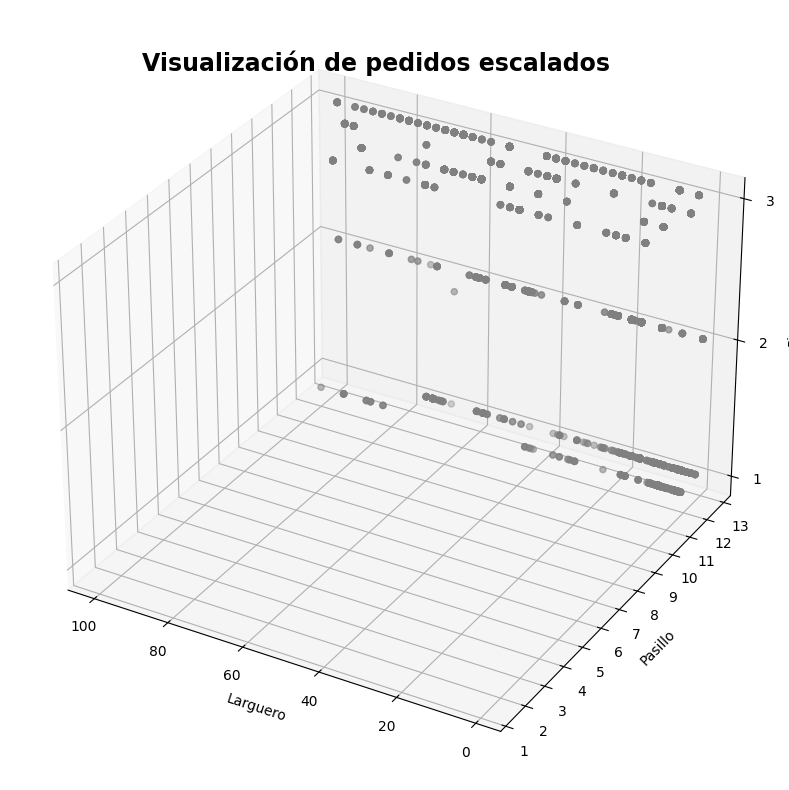

In [ ]:
#Nuevamente graficamos

# Generamos el gráfico
fig = plt.figure(figsize=(15, 10))  # Ajustamos el tamaño de la figura
fig.suptitle('Visualización de pedidos escalados', y=0.84, fontweight="black", fontsize=17)

# Crear el gráfico 3D
ax1 = fig.add_subplot(111, projection='3d')

# Graficar los datos
ax1.scatter(df_standard_22['nposlarg'], df_standard_22['pasillo'], df_standard_22['piso'], c='gray', marker='o')

# Invertir el eje X
ax1.invert_xaxis()

# Establecer los ticks para el eje Y
plt.yticks(range(1, mt.ceil(max(df_standard_22['pasillo'])) + 1, 1))

# Establecer los ticks para el eje Z (Piso)
ax1.set_zticks(range(1, int(max(df_standard_22['piso'])) + 1, 1))


# Etiquetas de los ejes
plt.xlabel('Larguero')
plt.ylabel('Pasillo')
ax1.set_zlabel('Piso', rotation=90)

# Mostrar el gráfico
plt.show()

## Aplicación de Estandarización

Dado que ya hemos escalado nuestros datos para validar la distribución de la información en el plano, procedemos a realizar un escalamiento, teniendo en cuenta lo comentado en las observaciones. Esto es para evitar que los datos sean ponderados con mayores pesos en el proceso de clustering y asegurar que se distribuyan de la manera más adecuada para el modelo.

Con este objetivo, aplicamos un proceso de **estandarización** utilizando bibliotecas de **sklearn**, como es el `StandardScaler`.

### ¿Qué es el `StandardScaler`?

El `StandardScaler` es una herramienta proporcionada por la biblioteca `sklearn` que **estandariza** los datos transformando las características de entrada para que tengan una media de 0 y una desviación estándar de 1. Esto significa que el escalado no se realiza mediante una simple reescala de los valores, sino que, en lugar de eso, se elimina la media y se ajusta la variabilidad (desviación estándar).

La fórmula de la estandarización es la siguiente:

$$ z = \frac{(x - \mu)}{\sigma} $$

Donde:
- $x$ es el valor original de la característica.
- $\mu$ es la media de los datos de esa característica.
- $\sigma$ es la desviación estándar de los datos.

Este proceso asegura que las características estén en la misma escala, lo cual es importante para muchos algoritmos de machine learning, especialmente aquellos que utilizan distancias, como el clustering y los algoritmos basados en la distancia, como KNN o KMeans.

Para ello, realizamos el siguiente procedimiento:


In [ ]:
#Creacion y aplicacion del scaler
scaler_t= StandardScaler()

df_standard_20 = scaler_t.fit_transform(df_standard_20)
df_standard_20= pd.DataFrame(data = df_standard_20, columns= ['piso', 'pasillo', 'nposlarg'])

df_standard_21 = scaler_t.fit_transform(df_standard_21)
df_standard_21= pd.DataFrame(data = df_standard_21, columns= ['piso', 'pasillo', 'nposlarg'])

df_standard_22 = scaler_t.fit_transform(df_standard_22)
df_standard_22= pd.DataFrame(data = df_standard_22, columns= ['piso', 'pasillo', 'nposlarg'])




---

# Creación del modelo

Una vez que hemos estandarizado todos nuestros datos, contamos con un total de tres conjuntos de datos, uno por cada local de despacho de la compañía: **df_standard_20**, **df_standard_21** y **df_standard_22**. Estos conjuntos de datos serán procesados por el modelo de Machine Learning **K-means clustering**. Este modelo es adecuado para nuestro caso, ya que permite calcular y agrupar los datos en función de la **distancia euclidiana**, una métrica de distancia comúnmente utilizada en aplicaciones físicas, como la determinación de recorridos por parte de los humanos. La distancia euclidiana es la métrica que mejor se adapta a nuestro problema de aplicación, ya que simula el recorrido físico de los productos dentro del almacén.

Para la creación del modelo, aplicamos el algoritmo de **Machine Learning KMeans**, dado que necesitamos identificar la mejor cantidad de **clusters** en función de nuestros datos. Debido a la naturaleza de nuestra aplicación, hemos decidido limitar el número máximo de clusters a **10**. Esta limitación se debe a que, en temporadas altas, el número máximo de operarios suele ser 10, lo que nos permite ajustar el modelo de manera más realista a las condiciones operativas.

Este enfoque ayudará a determinar la cantidad ideal de personas necesarias para el procesamiento de nuestra carga de pedidos, basándonos en los clusters generados por el modelo. Además, los clusters pueden ser definidos en función de la disponibilidad de operarios: si solo contamos con 3 personas para el proceso, sería innecesario y poco práctico generar 6 clusters.

Con esta estrategia, buscamos un balance entre la cantidad de clusters y la capacidad real de procesamiento de nuestro equipo de trabajo, optimizando así la distribución y carga de trabajo.

Dicho esto, el código para aplicar el modelo de KMeans es el siguiente:

## Modelo Local 200

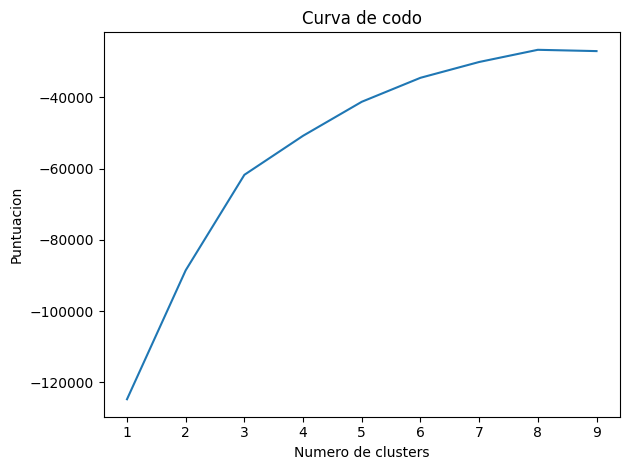

In [ ]:
#Aplicacion y creacion del modelo para local 200
Nc = range(1, 10)
kmeans = [KMeans(n_clusters=i) for i in Nc]

score = [kmeans[i].fit(df_standard_20).score(df_standard_20) for i in range(len(kmeans))]

fig = plt.figure()
plt.plot(Nc,score)
plt.xlabel('Numero de clusters')
plt.ylabel('Puntuacion')
plt.title('Curva de codo')
plt.xticks(range(1,10,1))
fig.tight_layout()
plt.show()

Observando los resultados gráficos obtenidos, procedemos a definir el número de **clusters**. En este caso, el número ideal podría ser **6** y/o **7**, dependiendo de las características del conjunto de datos. Sin embargo, como se mencionó anteriormente, la selección del número de clusters dependerá de los **recursos operativos** disponibles en el momento.

Con base en esta observación y con fines prácticos, el número de clusters seleccionado para este modelo será **6**. Este número es adecuado para representar la carga de trabajo en función de la capacidad operativa actual, optimizando el procesamiento de pedidos.

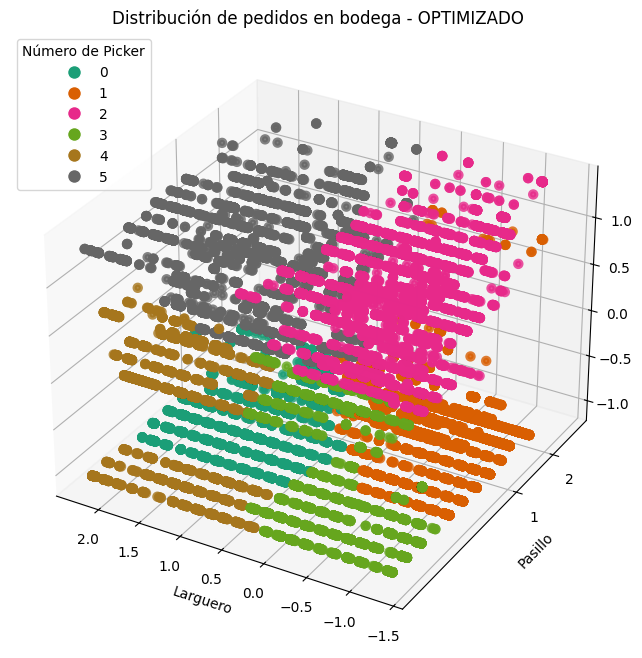

In [ ]:
#Predecimos nuestros clusters
kmeans = KMeans(n_clusters=6).fit(df_standard_20)
labels = kmeans.predict(df_standard_20)
df_standard_20['ola'] = labels

#graficamos la nueva distribucion de pedidos
import matplotlib.lines as mlines

fig = plt.figure(figsize=(8, 8))
my_cmap = plt.get_cmap('Dark2')
ax2 = fig.add_subplot(projection='3d')

# Graficar los puntos con los colores basados en 'ola'
sc = ax2.scatter(df_standard_20['nposlarg'], df_standard_20['pasillo'], df_standard_20['piso'], c=df_standard_20['ola'], marker='o',
                 cmap=my_cmap, alpha=0.8, linewidths=3)

# Invertir el eje X
ax2.invert_xaxis()

# Establecer las marcas del eje Y
plt.yticks(range(1, mt.ceil(max(df_standard_20['pasillo'])), 1))

# Títulos y etiquetas de los ejes
plt.title('Distribución de pedidos en bodega - OPTIMIZADO')
plt.xlabel('Larguero')
plt.ylabel('Pasillo')
ax2.set_zlabel('Piso', rotation=90)

# Crear una leyenda personalizada con cuadros de colores para los valores de 'ola'
# Definir los valores únicos de 'ola' y los colores correspondientes
unique_ola = sorted(df_standard_20['ola'].unique())
handles = []
for ola_value in unique_ola:
    color = my_cmap(ola_value / max(unique_ola))  # Obtener el color correspondiente
    handle = mlines.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=10, label=f'{ola_value}')
    handles.append(handle)

# Agregar la leyenda personalizada al gráfico
plt.legend(handles=handles, title='Número de Picker')

# Mostrar el gráfico
plt.show()

Una vez generado el gráfico y aplicada la clasificación, podemos observar que el modelo está logrando clasificar y agrupar los pedidos de manera efectiva. La distribución se realiza en función de los pedidos más cercanos, agrupándolos dentro de los diferentes pisos de cada una de las zonas en el Centro de Distribución (CD).

Esto indica que el modelo está cumpliendo con la tarea de clasificar los pedidos de acuerdo a lo requerido, basándose en los datos de proximidad.

Es importante resaltar que, una vez aplicados el modelo y obtenidos los datos de los clusters, el paso final sería asignar a nuestro dataset inicial df las nuevas etiquetas generadas. Posteriormente, procederemos a organizar la información segmentando por grupo, para asignarla a cada uno de los pickers (operarios encargados de la recolección de productos).

Con esta etapa completada, replicaremos el mismo procedimiento en los demás locales para optimizar la distribución de los pedidos a nivel global.



---

## Modelo Local 201


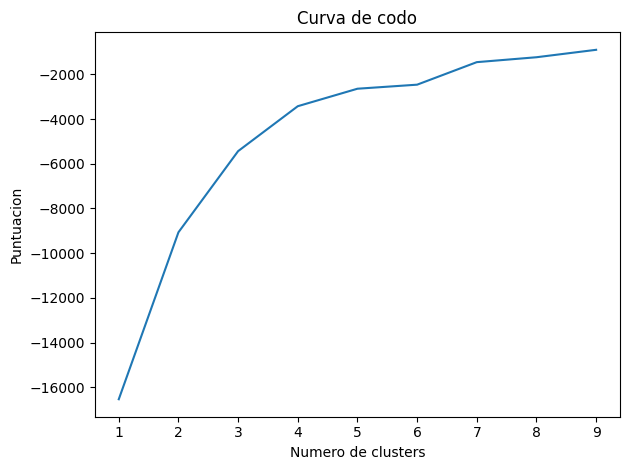

In [ ]:
#Aplicacion y creacion del modelo para local 200
Nc = range(1, 10)
kmeans = [KMeans(n_clusters=i) for i in Nc]

score = [kmeans[i].fit(df_standard_21).score(df_standard_21) for i in range(len(kmeans))]

fig = plt.figure()
plt.plot(Nc,score)
plt.xlabel('Numero de clusters')
plt.ylabel('Puntuacion')
plt.title('Curva de codo')
plt.xticks(range(1,10,1))
fig.tight_layout()
plt.show()

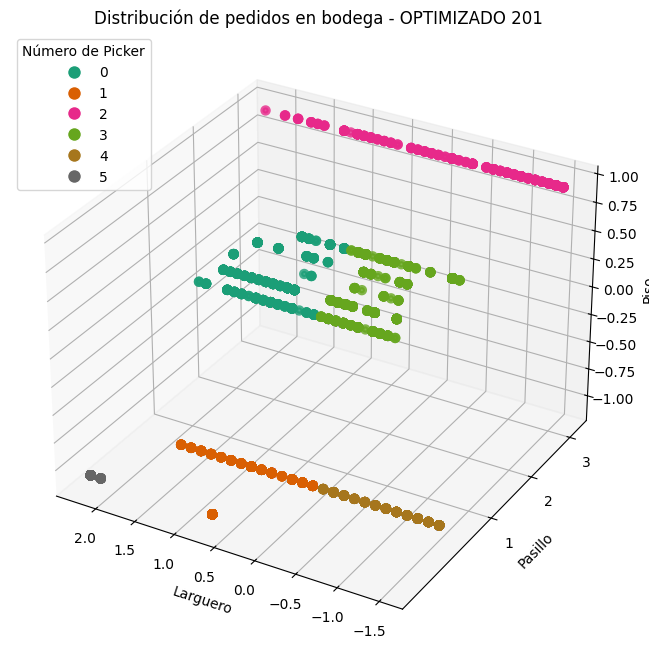

In [ ]:
#Predecimos nuestros clusters de igual manera con 6 clusters
kmeans = KMeans(n_clusters=6).fit(df_standard_21)
labels = kmeans.predict(df_standard_21)
df_standard_21['ola'] = labels

#graficamos la nueva distribucion de pedidos

fig = plt.figure(figsize=(8, 8))
my_cmap = plt.get_cmap('Dark2')
ax2 = fig.add_subplot(projection='3d')

# Graficar los puntos con los colores basados en 'ola'
sc = ax2.scatter(df_standard_21['nposlarg'], df_standard_21['pasillo'], df_standard_21['piso'], c=df_standard_21['ola'], marker='o',
                 cmap=my_cmap, alpha=0.8, linewidths=3)

# Invertir el eje X
ax2.invert_xaxis()

# Establecer las marcas del eje Y
plt.yticks(range(1, mt.ceil(max(df_standard_21['pasillo'])), 1))

# Títulos y etiquetas de los ejes
plt.title('Distribución de pedidos en bodega - OPTIMIZADO 201')
plt.xlabel('Larguero')
plt.ylabel('Pasillo')
ax2.set_zlabel('Piso', rotation=90)

# Crear una leyenda personalizada con cuadros de colores para los valores de 'ola'
# Definir los valores únicos de 'ola' y los colores correspondientes
unique_ola = sorted(df_standard_21['ola'].unique())
handles = []
for ola_value in unique_ola:
    color = my_cmap(ola_value / max(unique_ola))  # Obtener el color correspondiente
    handle = mlines.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=10, label=f'{ola_value}')
    handles.append(handle)

# Agregar la leyenda personalizada al gráfico
plt.legend(handles=handles, title='Número de Picker')

# Mostrar el gráfico
plt.show()

---
## Modelo Local 202


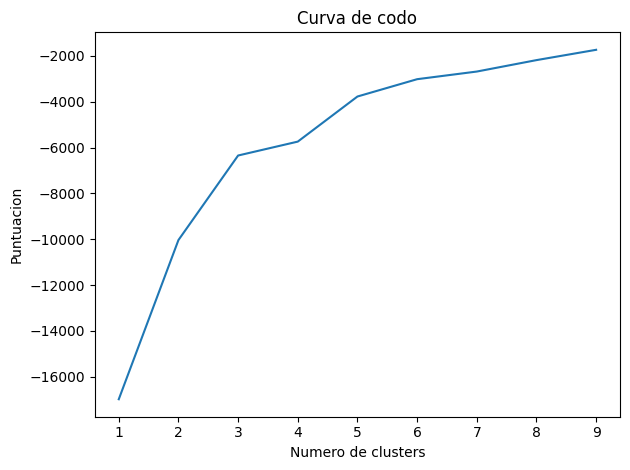

In [ ]:
#Aplicacion y creacion del modelo para local 202
Nc = range(1, 10)
kmeans = [KMeans(n_clusters=i) for i in Nc]

score = [kmeans[i].fit(df_standard_22).score(df_standard_22) for i in range(len(kmeans))]

fig = plt.figure()
plt.plot(Nc,score)
plt.xlabel('Numero de clusters')
plt.ylabel('Puntuacion')
plt.title('Curva de codo')
plt.xticks(range(1,10,1))
fig.tight_layout()
plt.show()

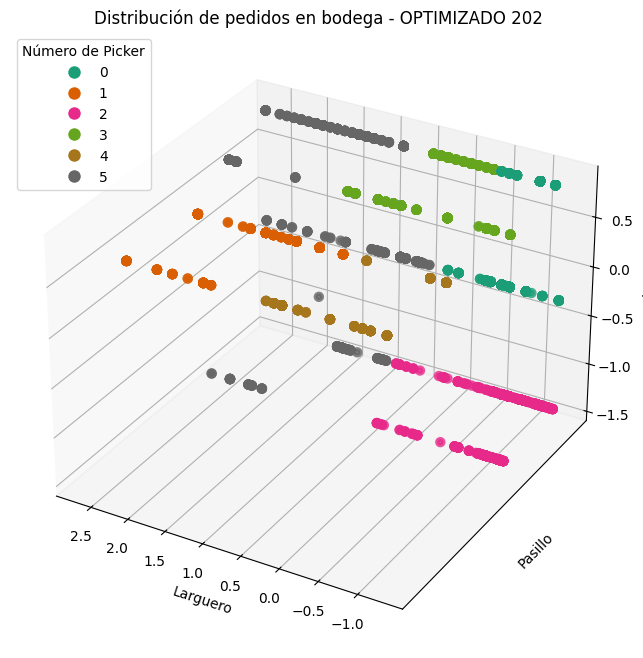

In [ ]:
#Predecimos nuestros clusters
kmeans = KMeans(n_clusters=6).fit(df_standard_22)
labels = kmeans.predict(df_standard_22)
df_standard_22['ola'] = labels

#graficamos la nueva distribucion de pedidos

fig = plt.figure(figsize=(8, 8))
my_cmap = plt.get_cmap('Dark2')
ax2 = fig.add_subplot(projection='3d')

# Graficar los puntos con los colores basados en 'ola'
sc = ax2.scatter(df_standard_22['nposlarg'], df_standard_22['pasillo'], df_standard_22['piso'], c=df_standard_22['ola'], marker='o',
                 cmap=my_cmap, alpha=0.8, linewidths=3)

# Invertir el eje X
ax2.invert_xaxis()

# Establecer las marcas del eje Y
plt.yticks(range(1, mt.ceil(max(df_standard_22['pasillo'])), 1))

# Títulos y etiquetas de los ejes
plt.title('Distribución de pedidos en bodega - OPTIMIZADO 202')
plt.xlabel('Larguero')
plt.ylabel('Pasillo')
ax2.set_zlabel('Piso', rotation=90)

# Crear una leyenda personalizada con cuadros de colores para los valores de 'ola'
# Definir los valores únicos de 'ola' y los colores correspondientes
unique_ola = sorted(df_standard_22['ola'].unique())
handles = []
for ola_value in unique_ola:
    color = my_cmap(ola_value / max(unique_ola))  # Obtener el color correspondiente
    handle = mlines.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=10, label=f'{ola_value}')
    handles.append(handle)

# Agregar la leyenda personalizada al gráfico
plt.legend(handles=handles, title='Número de Picker')

# Mostrar el gráfico
plt.show()



---

# Evaluación Del Modelo

De acuerdo con los procedimientos y los resultados obtenidos durante la aplicación del modelo de Machine Learning al conjunto de datos, es posible afirmar lo siguiente:

* La implementación del modelo de Clustering facilita de manera eficiente la agrupación de los pedidos para su alistamiento. Este es uno de nuestros objetivos clave, ya que optimiza el recorrido de los operarios para el despacho de los pedidos.

* Aunque el algoritmo es eficiente en términos de tiempo de ejecución y rapidez para asignar los grupos, es importante destacar que debido al gran número de preprocesamientos que se deben aplicar al modelo, es crucial realizar una depuración adecuada al obtener los pedidos, tomando en cuenta las condiciones específicas informadas.

* En los pedidos observamos que existen aquellos que deben ser procesados por maquinaria. Por esta razón, se recomienda implementar un modelo diferenciado para este tipo de pedidos dentro del mismo centro de distribución (CD), teniendo en cuenta las condiciones físicas del almacén. Esto se debe a que, si la maquinaria realiza la actividad, no se puede utilizar personal operativo en piso para estas tareas. Por lo tanto, la implementación de la maquinaria debe organizarse por franjas horarias.

* Es fundamental incorporar franjas horarias de ejecución, considerando las horas de despacho. Es decir, debe agregarse una validación horaria para cada transportadora que despacha los pedidos, con el fin de cumplir con las fechas pactadas de entrega y garantizar la promesa de entrega de los pedidos.

* Si bien el modelo optimiza el procedimiento para hacer más eficiente la cantidad de pedidos a recoger, es esencial tener en cuenta que esto, por sí solo, no es suficiente para garantizar una entrega de calidad. Se requiere una adecuada estructuración de los datos a partir de ejes de referencia para ordenar los pedidos y evitar el actual problema de alistamiento. Esto se puede lograr segmentando los pedidos según los grupos (columna OLA del dataset), y una vez segmentados, ordenando los datos según el pasillo (columna Pasillo). De esta manera, se optimiza el recorrido, comenzando desde el pasillo más alejado hasta el más cercano al punto de descarga de los pedidos. Finalmente, se puede aplicar una tercera capa de filtrado basada en el larguero (columna nposlarg), recogiendo los pedidos cercanos en cada piso de la zona.

* Aunque el modelo en sí mismo es muy útil, es necesario realizar un post-procesamiento de los datos, lo que demuestra que, por sí solo, el modelo no es suficiente para planificar adecuadamente los pedidos. Sin embargo, representa una solución rápida, óptima y muy eficiente para el procesamiento de los pedidos. Al integrar este procesamiento adicional, se logra un sistema altamente capaz que brinda solución a nuestra problemática planteada.

En resumen, la implementación del modelo de Clustering para la agrupación de pedidos ha demostrado ser una herramienta eficiente para optimizar el proceso de alistamiento y reducir el tiempo de recorrido de los operarios en el almacén. Sin embargo, para maximizar su efectividad, es crucial realizar un preprocesamiento adecuado de los datos y aplicar estrategias adicionales, como la segmentación por franjas horarias y la consideración de maquinaria para ciertos pedidos. Además, si bien el modelo optimiza la asignación de pedidos, se requiere una estructura de datos bien organizada y un post-procesamiento exhaustivo para garantizar la precisión en el alistamiento y el cumplimiento de los plazos de entrega. En conjunto, la combinación del modelo de Clustering con estos ajustes operativos permite una solución ágil, precisa y escalable, que no solo mejora la eficiencia del proceso logístico, sino que también aborda los desafíos actuales en la planificación de pedidos, contribuyendo significativamente a la mejora de la operación en el centro de distribución.

In [24]:
!sudo apt-get update
!sudo apt-get install -y pandoc texlive-xetex texlive-fonts-recommended


Get:1 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Get:2 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Get:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Get:4 https://r2u.stat.illinois.edu/ubuntu jammy InRelease [6,555 B]
Hit:5 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:6 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Hit:7 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Get:8 http://security.ubuntu.com/ubuntu jammy-security/main amd64 Packages [2,425 kB]
Hit:9 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Get:10 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  Packages [1,110 kB]
Hit:11 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:12 http://security.ubuntu.com/ubuntu jammy-security/universe amd64 Packages [1,164 kB]
Get:13 https://r2u.stat.il

In [26]:
## EXPORTAMOS A PDF
!jupyter nbconvert --to pdf Proyecto.ipynb


[NbConvertApp] Converting notebook Proyecto.ipynb to pdf
[NbConvertApp] Support files will be in Proyecto_files/
[NbConvertApp] Making directory ./Proyecto_files
[NbConvertApp] Writing 138480 bytes to notebook.tex
[NbConvertApp] Building PDF
[NbConvertApp] Running xelatex 3 times: ['xelatex', 'notebook.tex', '-quiet']
[NbConvertApp] Running bibtex 1 time: ['bibtex', 'notebook']
[NbConvertApp] WARNING | bibtex had problems, most likely because there were no citations
[NbConvertApp] PDF successfully created
[NbConvertApp] Writing 1833179 bytes to Proyecto.pdf
